# Lecture 8 – Data 100, Fall 2024

Data 100, Fall 2024

[Acknowledgments Page](https://ds100.org/fa24/acks/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
wb = pd.read_csv("data/world_bank.csv", index_col=0)
wb = wb.rename(columns={'Antiretroviral therapy coverage: % of people living with HIV: 2015':"HIV rate",
                       'Gross national income per capita, Atlas method: $: 2016':'gni'})
wb.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


# Plotting Distributions - Revisited

## Diving into `displot`

Seaborn [documentation](https://seaborn.pydata.org/generated/seaborn.displot.html) for `sns.displot` lets you specify the `kind` of plot.

When plotting a histogram,  you can pass in `histplot` ([link](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)) parameters to `displot` to specify histogram-specific features.

For example, `stat=density` normalizes the histogram such that the area under the histogram is 1.

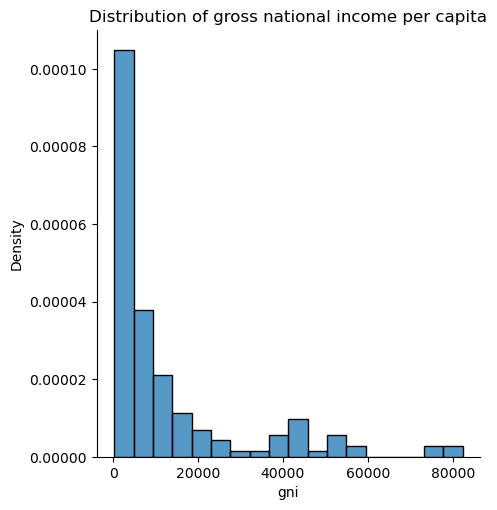

In [3]:
sns.displot(data=wb, 
            x="gni", 
            kind="hist", 
            stat="density") # default: stat=count and density integrates to 1
plt.title("Distribution of gross national income per capita");

What does it mean to specify `kind=kde`? We will explore this!

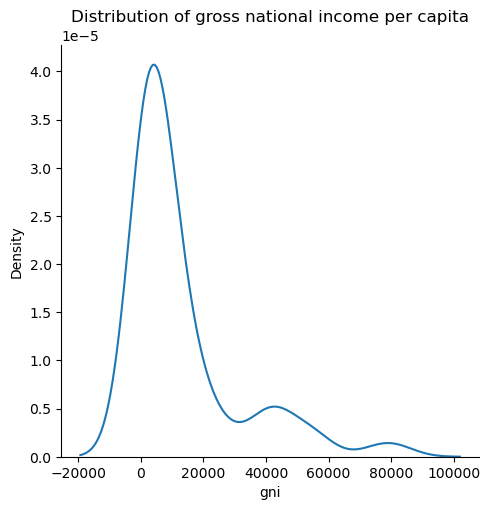

In [4]:
sns.displot(data=wb, 
            x="gni", 
            kind='kde')
plt.title("Distribution of gross national income per capita");

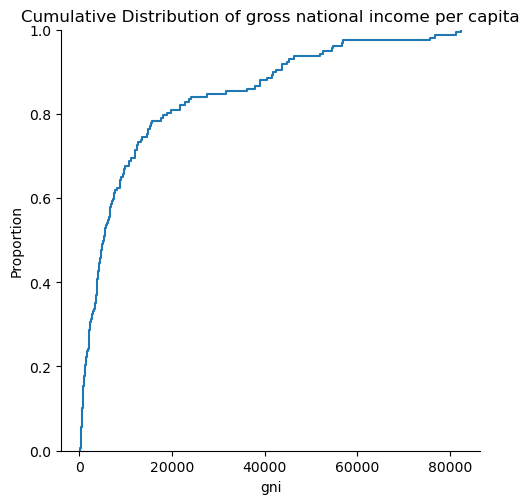

In [5]:
sns.displot(data=wb, 
            x="gni", 
            kind='ecdf')
plt.title("Cumulative Distribution of gross national income per capita");

## Scatter Plots

Scatter plots are used to visualize the **relationship** between two **quantitative continuous variables**.

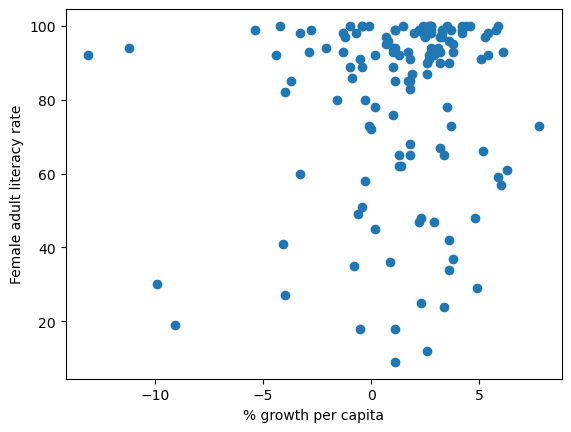

In [6]:
plt.scatter(wb['per capita: % growth: 2016'], wb['Adult literacy rate: Female: % ages 15 and older: 2005-14'])
plt.xlabel("% growth per capita")
plt.ylabel("Female adult literacy rate");

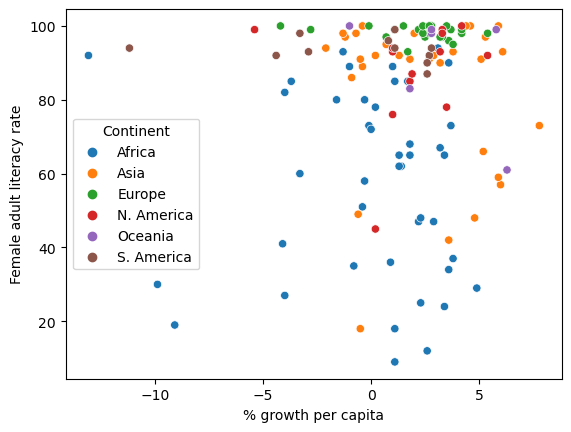

In [7]:
sns.scatterplot(data=wb, x='per capita: % growth: 2016', \
                y='Adult literacy rate: Female: % ages 15 and older: 2005-14', hue="Continent")
plt.xlabel("% growth per capita")
plt.ylabel("Female adult literacy rate");

The plots above suffer from **overplotting** – many scatter points are stacked on top of one another (particularly in the upper right region of the plot). 

**Jittering** is a processed used to address overplotting. A small amount of random noise is added to the x and y values of all datapoints. 

Decreasing the size of each scatter point using the `s` parameter of `plt.scatter` also helps.

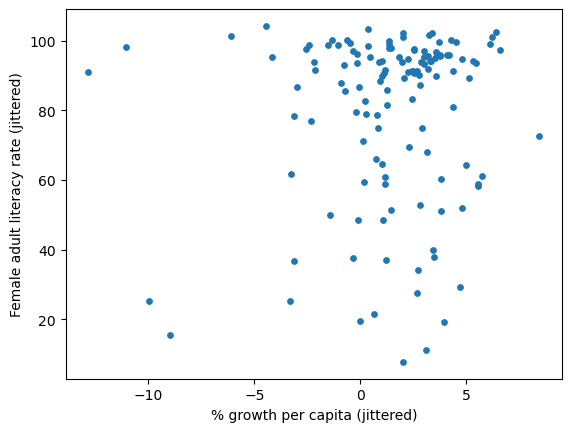

In [8]:
random_x_noise = np.random.uniform(-1, 1, len(wb))
random_y_noise = np.random.uniform(-5, 5, len(wb))

plt.scatter(wb['per capita: % growth: 2016']+random_x_noise, \
            wb['Adult literacy rate: Female: % ages 15 and older: 2005-14']+random_y_noise, s=15)

plt.xlabel("% growth per capita (jittered)")
plt.ylabel("Female adult literacy rate (jittered)");

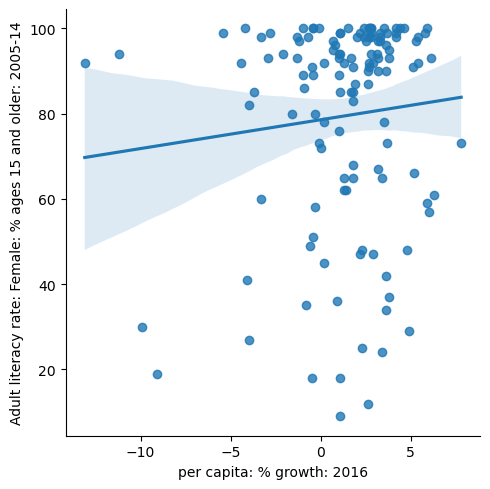

In [9]:
sns.lmplot(data=wb, x='per capita: % growth: 2016', \
           y='Adult literacy rate: Female: % ages 15 and older: 2005-14');

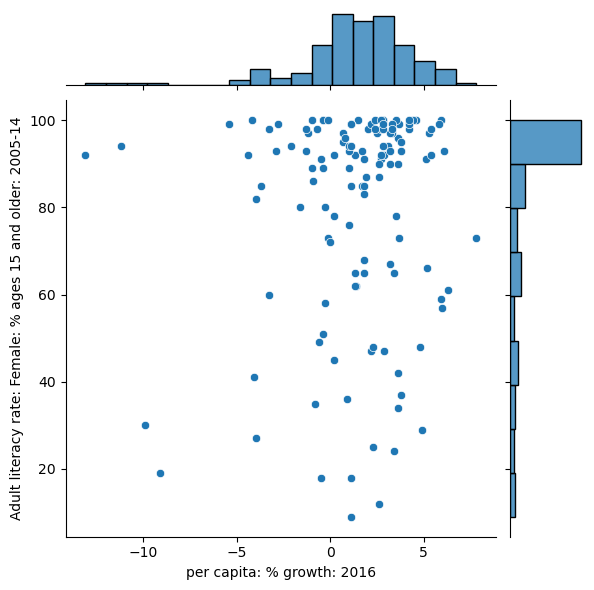

In [10]:
sns.jointplot(data=wb, x='per capita: % growth: 2016', \
              y='Adult literacy rate: Female: % ages 15 and older: 2005-14');

## Hex Plots

Rather than plot individual datapoints, plot the *density* of how datapoints are distributed in 2D. A darker hexagon means that more datapoints lie in that region.

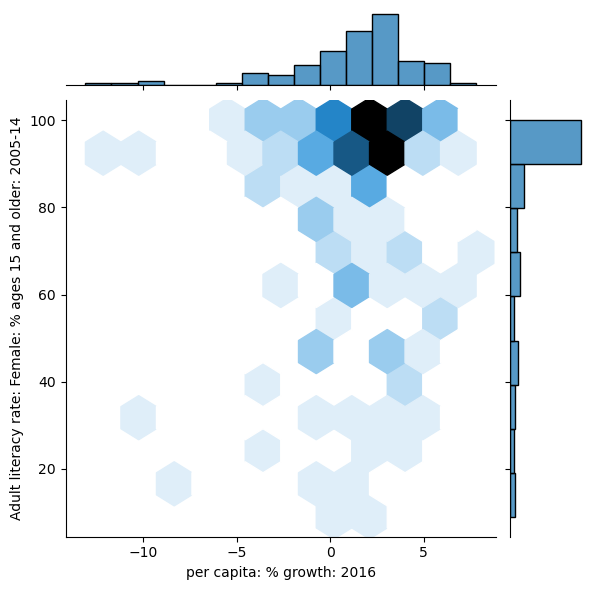

In [11]:
sns.jointplot(data=wb, x='per capita: % growth: 2016', \
              y='Adult literacy rate: Female: % ages 15 and older: 2005-14',
              kind='hex');

## Contour Plots

Contour plots are similar to topographic maps. Contour lines of the same color have the same *density* of data points. The region with the darkest color contains the most data points of all regions. We can think of a contour plot as the 2D equivalent of a KDE curve.

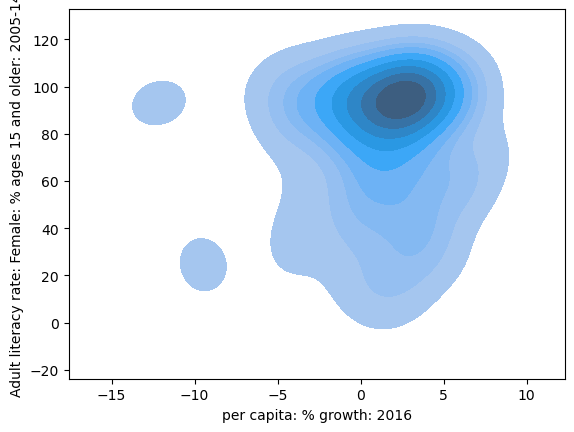

In [12]:
sns.kdeplot(data=wb, x='per capita: % growth: 2016', \
              y='Adult literacy rate: Female: % ages 15 and older: 2005-14', fill=True);

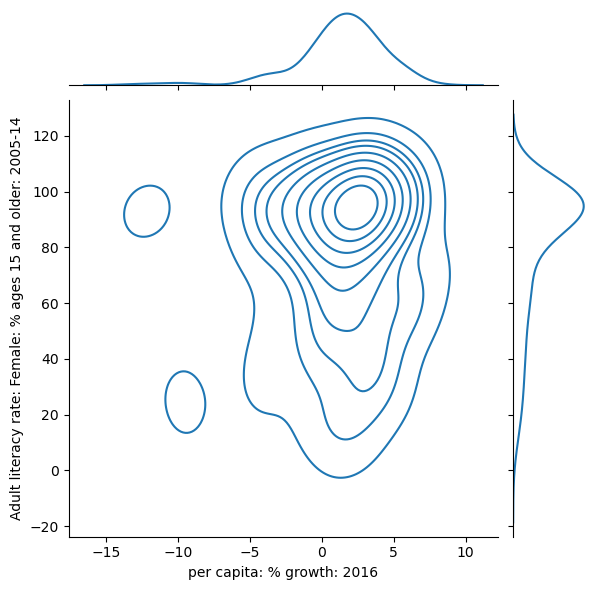

In [13]:
sns.jointplot(data=wb, x='per capita: % growth: 2016', \
              y='Adult literacy rate: Female: % ages 15 and older: 2005-14',
              kind='kde');

# Transformations

Often, our reason for visualizing relationships like we did above is beause we then want to *model* these relationships. We will start talking about the theory and math underlying modeling processes next week.

We will focus a lot on **linear modeling** in Data 100. This means that it is often helpful to transform and **linearize** our data such that it shows roughly a linear relationship. There are a few reasons for this:
* Transforming data makes visualizations easier to interpret
* Linear relationships are straightforward to understand – we have ideas of what slopes and intercepts mean
* Later on in the course, the ability to linearize data will help us make more effective models


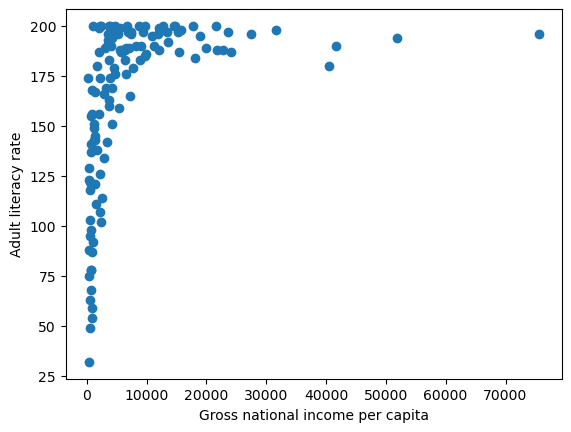

In [14]:
# Some data cleaning to help with the next example

df = pd.DataFrame(index=wb.index)
df['lit'] = wb['Adult literacy rate: Female: % ages 15 and older: 2005-14'] \
            + wb["Adult literacy rate: Male: % ages 15 and older: 2005-14"]
df['inc'] = wb['gni']
df.dropna(inplace=True)

plt.scatter(df["inc"], df["lit"])
plt.xlabel("Gross national income per capita")
plt.ylabel("Adult literacy rate");

What is making this plot non-linear?
* There are a few extremely large values for gross national income that are distorting the horizontal scale of the plot. If we rescaled the x-values such that these large values become proportionally smaller, the plot would be more linear
* There are too many large values of adult literacy rate all clumped together at the top of the plot. If we rescaled the y-axis such that large values of y are more spread out, the plot would be more linear

First, we can transform the x-values such that very large values of x become smaller. This can be achieved by performing a **log transformation** of the gross national income data. When we take the logarithm of a large number, this number becomes proportionally much smaller relative to its original value. When we take the log of a small number, the number does not change very significantly relative to its starting value.

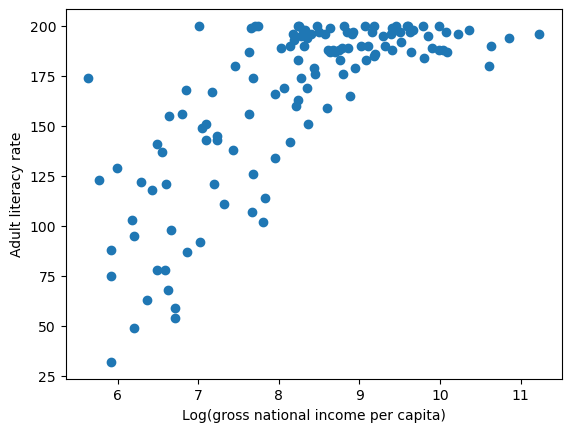

In [15]:
# np.log compute the natural (base e) logarithm
plt.scatter(np.log(df["inc"]), df["lit"])
plt.xlabel("Log(gross national income per capita)")
plt.ylabel("Adult literacy rate");

Already, the relationship is starting to look more linear! Now, we'll address the vertical scaling. 

To reduce the clumping of datapoints near the top of the plot, we want to spread out large values of y without substantially changing small values of y. We can do this by applying a **power transformation** – that is, by raising the y-values to a power. Below, we raise all y-values to the power of 4.

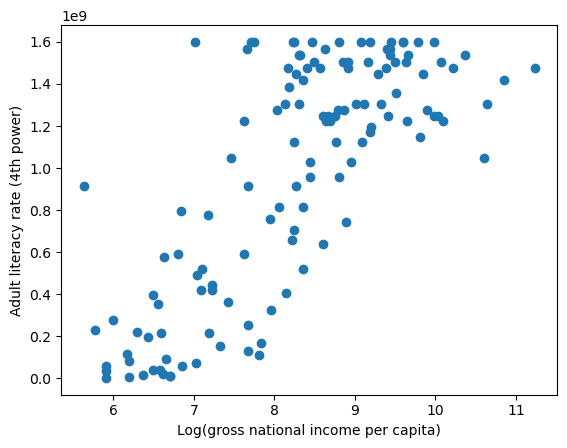

In [16]:
plt.scatter(np.log(df["inc"]), df["lit"]**4)
plt.xlabel("Log(gross national income per capita)")
plt.ylabel("Adult literacy rate (4th power)");

Our transformed variables now seem to follow a linear relationship! 

$$y^4 = m(\log{x}) + b$$

We can use this fact to uncover new information about the original, untransformed variables. 

$$y = [m(\log{x}) + b]^{1/4}$$

In the cell below, we first fit a regression line to the transformed data to find values for the slope ($m$) and intercept ($b$). Then, we plug these values into the relationship we derived for the *untransformed* variables. We find a mathematical relationship relating the gross national income and the adult literacy rate.

The slope, m, of the transformed data is: 336400693.43172705
The intercept, b, of the transformed data is: -1802204836.0479987


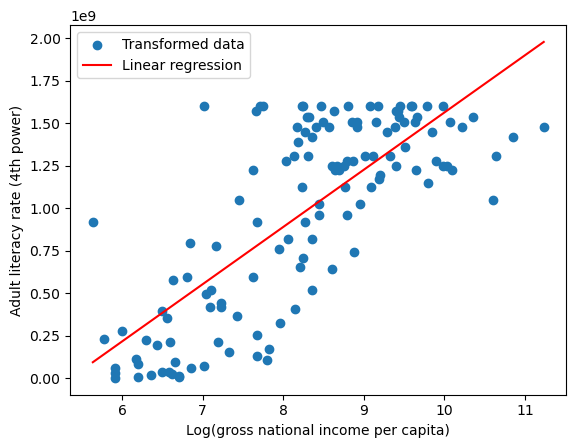

In [17]:
# The code below fits a linear regression model. We'll discuss it at length in a future lecture
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.log(df[["inc"]]), df["lit"]**4)
m, b = model.coef_[0], model.intercept_

print(f"The slope, m, of the transformed data is: {m}")
print(f"The intercept, b, of the transformed data is: {b}")

df = df.sort_values("inc")
plt.scatter(np.log(df["inc"]), df["lit"]**4, label="Transformed data")
plt.plot(np.log(df["inc"]), m*np.log(df["inc"])+b, c="red", label="Linear regression")
plt.xlabel("Log(gross national income per capita)")
plt.ylabel("Adult literacy rate (4th power)")
plt.legend();

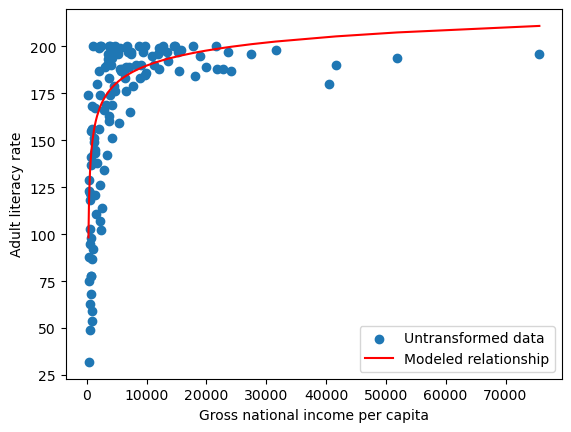

In [18]:
# Now, plug the values for m and b into the relationship between the untransformed x and y
plt.scatter(df["inc"], df["lit"], label="Untransformed data")
plt.plot(df["inc"], (m*np.log(df["inc"])+b)**(1/4), c="red", label="Modeled relationship")
plt.xlabel("Gross national income per capita")
plt.ylabel("Adult literacy rate")
plt.legend();

We've been able to find a fairly close approximation for the relationship between the original variables!

# Theory of Visualization
## Harnessing Scale

In [19]:
ppdf = pd.DataFrame(dict(Cancer=[2007371, 935573], Abortion=[289750, 327000]), 
                    index=pd.Series([2006, 2013], 
                    name="Year"))
ppdf

,Cancer,Abortion
Year,,
2006,2007371,289750
2013,935573,327000


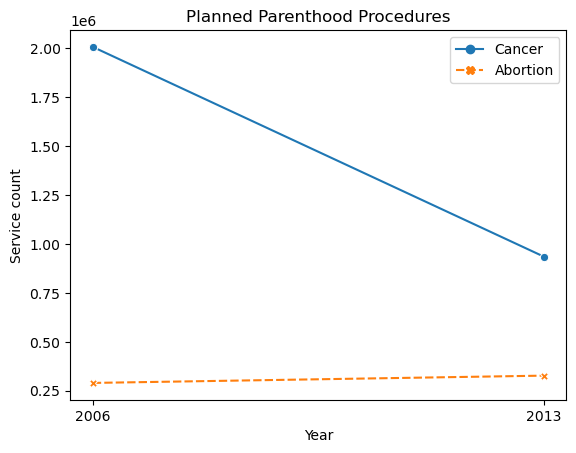

In [20]:
ax = sns.lineplot(data=ppdf, markers=True)
ax.set_title("Planned Parenthood Procedures")
ax.set_xticks([2006, 2013])
ax.set_ylabel("Service count");

Let's now compute the relative change between the two years...

In [21]:
rel_change = 100*(ppdf.loc[2013] - ppdf.loc[2006])/ppdf.loc[2006]
rel_change.name = "Percent Change"
rel_change

Cancer     -53.39312
Abortion    12.85591
Name: Percent Change, dtype: float64

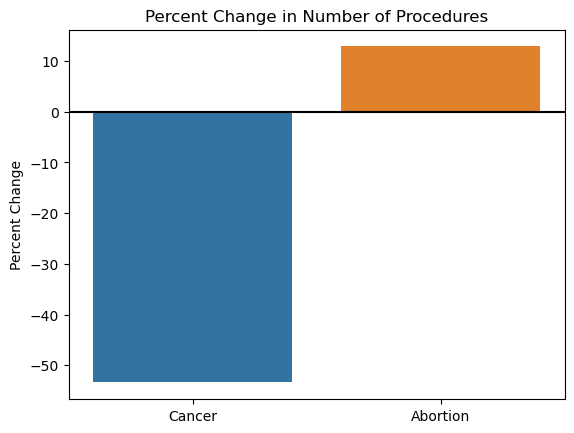

In [22]:
ax = sns.barplot(x=rel_change.index, y=rel_change)
ax.axhline(0, color='black')
ax.set_title("Percent Change in Number of Procedures");

## Harnessing Conditioning

In [23]:
cps = pd.read_csv("data/edInc2.csv")
cps

,educ,gender,income
0,1,Men,517
1,1,Women,409
2,2,Men,751
3,2,Women,578
4,3,Men,872
5,3,Women,661
6,4,Men,1249
7,4,Women,965
8,5,Men,1385
9,5,Women,1049


In [24]:
cps = cps.replace({'educ':{1:"<HS", 2:"HS", 3:"<BA", 4:"BA", 5:">BA"}})
cps.columns = ['Education', 'Gender', 'Income']
cps

,Education,Gender,Income
0,<HS,Men,517
1,<HS,Women,409
2,HS,Men,751
3,HS,Women,578
4,<BA,Men,872
5,<BA,Women,661
6,BA,Men,1249
7,BA,Women,965
8,>BA,Men,1385
9,>BA,Women,1049


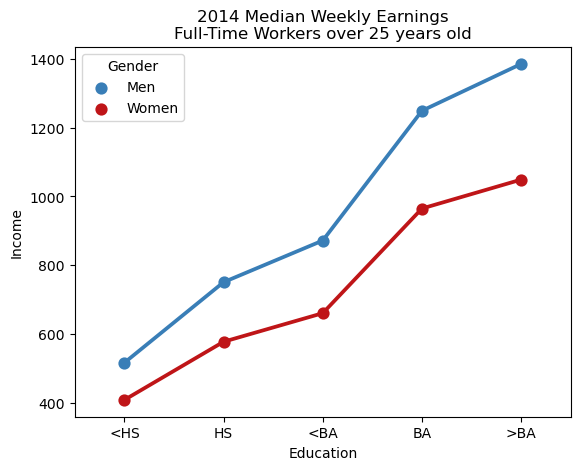

In [25]:
# Let's pick our colors specifically using color_palette()
blue_red = ["#397eb7", "#bf1518"]
with sns.color_palette(sns.color_palette(blue_red)):
    ax = sns.pointplot(data=cps, x="Education", y="Income", hue="Gender")

ax.set_title("2014 Median Weekly Earnings\nFull-Time Workers over 25 years old");

Now, let's compute the income gap as a relative quantity between men and women. Recall that the structure of the dataframe is as follows:

In [26]:
cps.head()

,Education,Gender,Income
0,<HS,Men,517
1,<HS,Women,409
2,HS,Men,751
3,HS,Women,578
4,<BA,Men,872


This calls for using `groupby` by Gender, so that we can separate the data for both genders, and then compute the ratio:

In [27]:
cg = cps.set_index("Education").groupby("Gender")
men = cg.get_group("Men").drop("Gender", axis="columns")
women = cg.get_group("Women").drop("Gender", axis="columns")
display(men, women)

,Income
Education,
<HS,517
HS,751
<BA,872
BA,1249
>BA,1385


,Income
Education,
<HS,409
HS,578
<BA,661
BA,965
>BA,1049


In [28]:
mfratio = men/women
mfratio.columns = ["Income Ratio (M/F)"]
mfratio

,Income Ratio (M/F)
Education,
<HS,1.264059
HS,1.299308
<BA,1.319213
BA,1.294301
>BA,1.320305


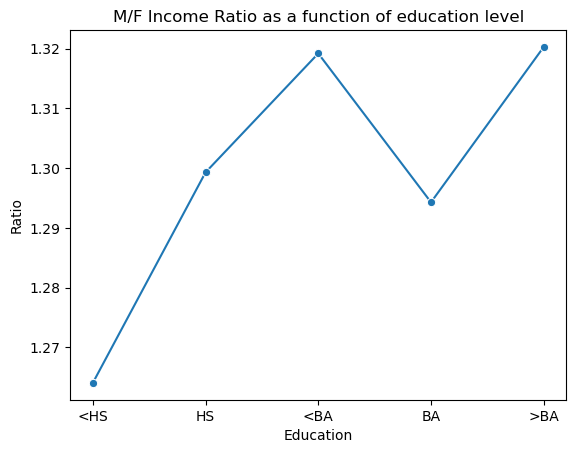

In [29]:
ax = sns.lineplot(data=mfratio, markers=True, legend=False);
ax.set_ylabel("Ratio")
ax.set_title("M/F Income Ratio as a function of education level");

Let's now compute the alternate ratio, F/M instead:

In [30]:
fmratio = women/men
fmratio.columns = ["Income Ratio (F/M)"]
fmratio

,Income Ratio (F/M)
Education,
<HS,0.791103
HS,0.769640
<BA,0.758028
BA,0.772618
>BA,0.757401


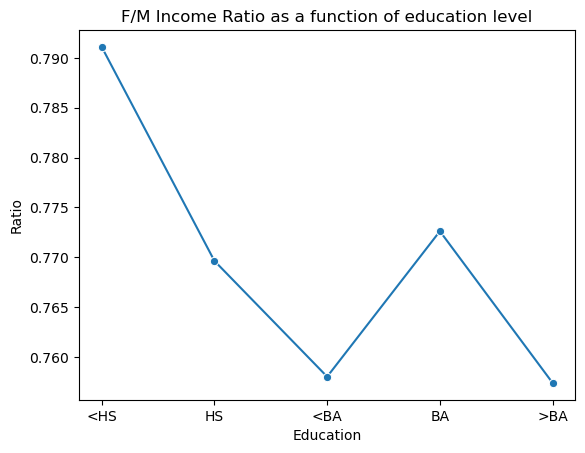

In [31]:
ax = sns.lineplot(data=fmratio, markers=True, legend=False);
ax.set_ylabel("Ratio")
ax.set_title("F/M Income Ratio as a function of education level");

## Harnessing Context

In [32]:
co2 = pd.read_csv("data/CAITcountryCO2.csv", skiprows=2,
                  names=["Country", "Year", "CO2"], encoding="ISO-8859-1")
co2.tail()

,Country,Year,CO2
30639,Vietnam,2012,173.0497
30640,World,2012,33843.0497
30641,Yemen,2012,20.5386
30642,Zambia,2012,2.7600
30643,Zimbabwe,2012,9.9800


In [33]:
last_year = co2.Year.iloc[-1]
last_year

2012

In [34]:
q = f"Country != 'World' and Country != 'European Union (15)' and Year == {last_year}"
top14_lasty = co2.query(q).sort_values('CO2', ascending=False).iloc[:14]
top14_lasty

,Country,Year,CO2
30490,China,2012,9312.5329
30634,United States,2012,5122.9094
30514,European Union (28),2012,3610.5137
30533,India,2012,2075.1808
30596,Russian Federation,2012,1721.5376
30541,Japan,2012,1249.2135
30521,Germany,2012,773.9585
30547,"Korea, Rep. (South)",2012,617.2418
30535,Iran,2012,593.8195
30485,Canada,2012,543.0242


In [35]:
top14 = co2[co2.Country.isin(top14_lasty.Country) & (co2.Year >= 1950)]
print(len(top14.Country.unique()))
top14.head()

14


,Country,Year,CO2
18822,Brazil,1950,19.6574
18829,Canada,1950,154.1408
18834,China,1950,78.6478
18858,European Union (28),1950,1773.6864
18865,Germany,1950,510.7323


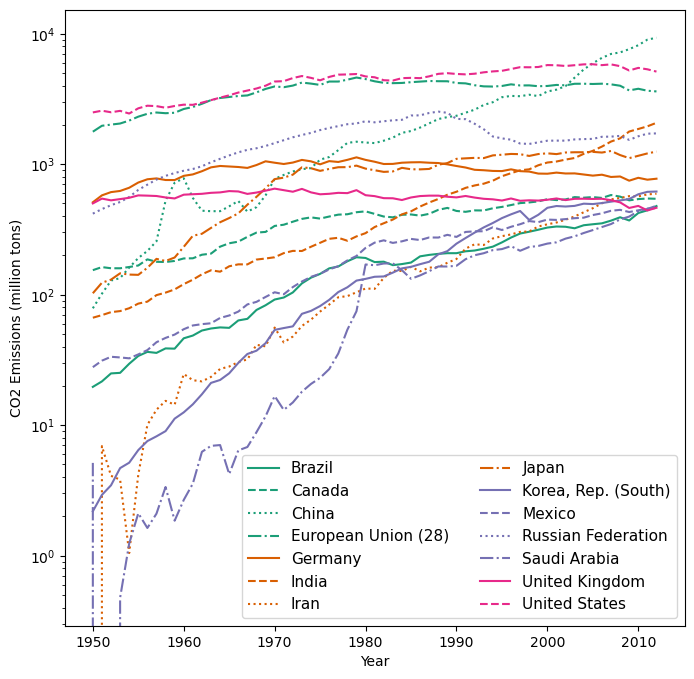

In [36]:
from cycler import cycler

linestyles = ['-', '--', ':', '-.' ]
colors = plt.cm.Dark2.colors
lines_c = cycler('linestyle', linestyles)
color_c = cycler('color', colors)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_prop_cycle(color_c * lines_c)

x, y ='Year', 'CO2'
for name, df in top14.groupby('Country'):
    ax.semilogy(df[x], df[y], label=name)

ax.set_xlabel(x)
ax.set_ylabel(f"{y} Emissions (million tons)")
ax.legend(ncol=2, frameon=True, fontsize=11);